# Analysis Report VIII



## Identifying and removing outliers

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize =(14,6))

In [6]:
data = pd.read_csv("dataset/aluguel_residencial.csv", sep = ";")

data.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<AxesSubplot:>

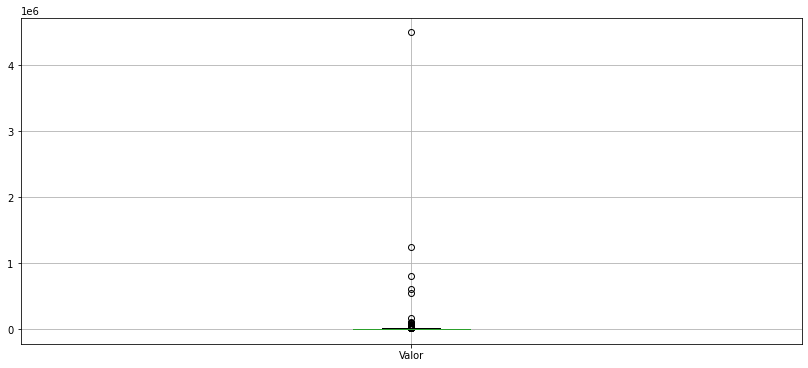

In [7]:
data.boxplot(['Valor'])   #Visualiza o boxplot da variável

In [9]:
data[data['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [16]:
valor = data['Valor']      #Series com a variável Valor

valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

### Técnica para outliers => Box plot

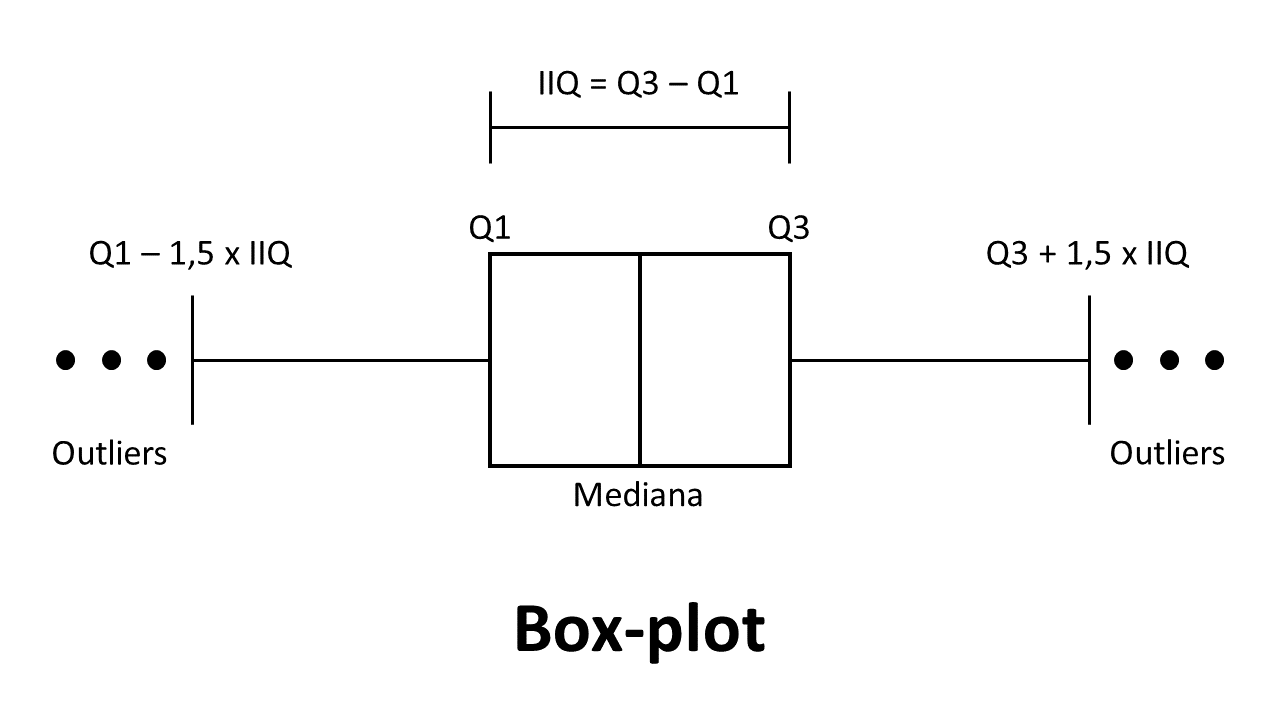

In [22]:
#Quantilies e limites
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)
print(limite_inferior, limite_superior )

-4250.0 11350.0


In [23]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

data_new = data[selecao]
data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

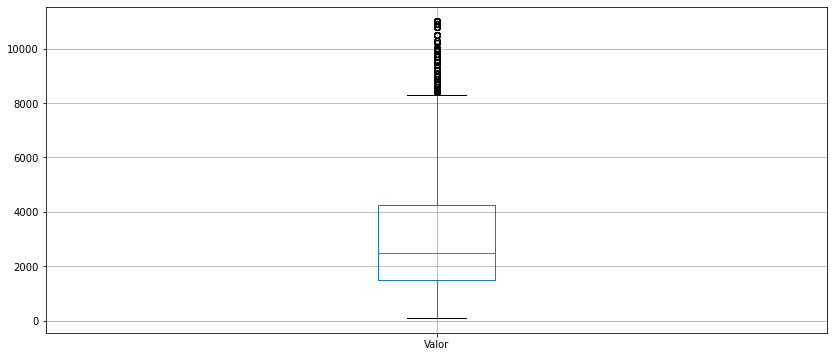

In [24]:
data_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

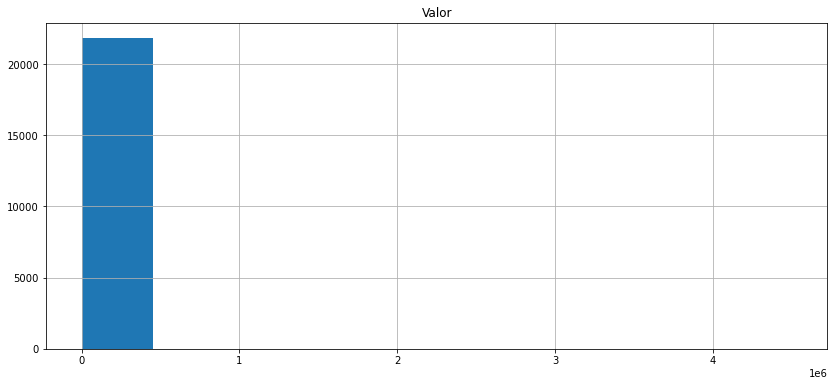

In [25]:
data.hist(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

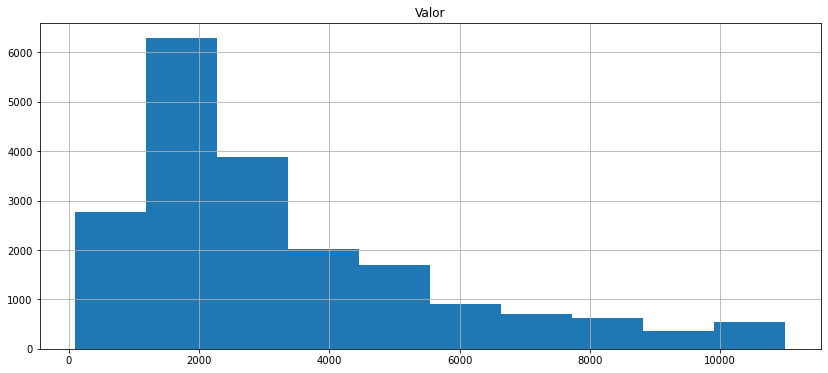

In [26]:
data_new.hist(['Valor'])

### Exercício

In [27]:
df = pd.read_csv("dataset/aluguel_amostra.csv", sep = ";")
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [28]:
valorm2 = df['Valor m2']
#Quantilies e limites
Q1 = valorm2.quantile(.25)
Q3 = valorm2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)
print(Q1, Q3,limite_inferior, limite_superior )

21.25 42.31 -10.340000000000003 73.9


## Identifying and removing outliers (continue...)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

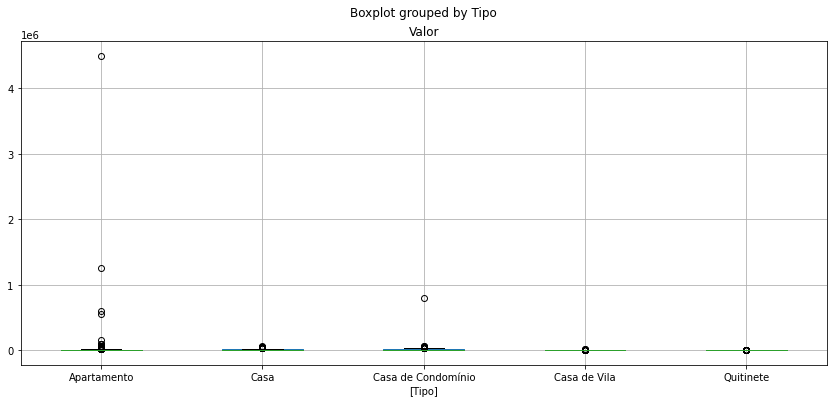

In [29]:
data.boxplot(['Valor'], by = ['Tipo'])

In [34]:
grupo_tipo = data.groupby('Tipo')['Valor']

grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [37]:
#Quantilies e limites
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5*IIQ)
limite_superior = Q3 + (1.5*IIQ)
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [38]:
limite_superior['Apartamento']

9950.0

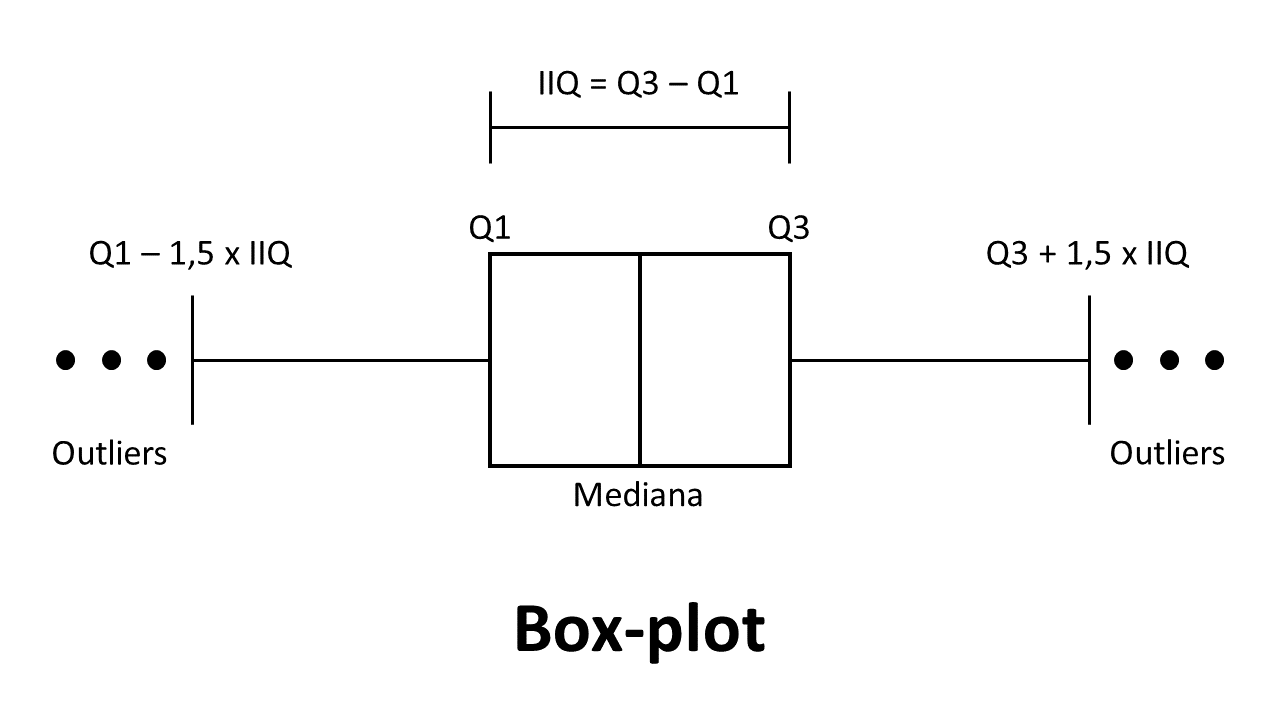

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

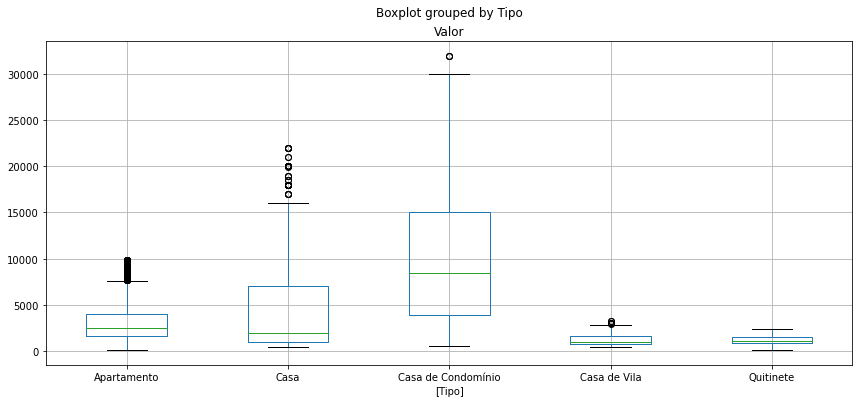

In [45]:
data_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = data['Tipo'] == tipo
    eh_dentro_limite = (data['Valor'] >= limite_inferior[tipo]) & (data['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    data_selecao = data[selecao]
    data_new = pd.concat([data_new, data_selecao])
data_new.boxplot(['Valor'], by = ['Tipo'])

In [46]:
data_new.to_csv('dataset/aluguel_residencial_sem_outliers.csv', sep = ";", index = False)